# Linear Regression

## 1 Linear regression with one variable

In this part of this exercise, you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.
You would like to use this data to help you select which city to expand to next.

### 1.1 Data visualization

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv('ex1data1.txt', header=None)
df = df.rename(columns={0: 'population', 1: 'profit'})
df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


Text(0, 0.5, 'profit')

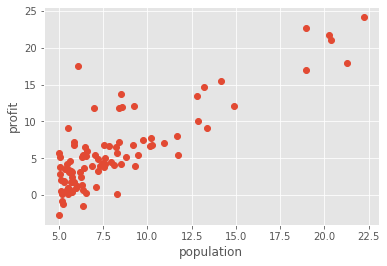

In [3]:
# visualize the data
plt.plot(df.population, df.profit, marker='o', linestyle='None')
plt.xlabel('population')
plt.ylabel('profit')

### 1.2 Batch gradient descent

The objective of linear regression is to minimize the cost function: 
$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^{m}(h_{\theta}(x^{(i)} - y^{(i)})^2$$
or in vectorized form:
$$ J(\theta) = \frac{1}{2m}(X\theta - y)^T (X\theta - y) $$
where the hypothesis $h_{\theta}(x)$ is:
$$ h_{\theta}(x) = \theta^{T} = \theta_{0} + \theta_{1}x_{1}$$

Optimization proess is as follows:
$$ \theta_{j} := \theta_{j} - \alpha \frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)} - y^{(i)})x_{j}^{(i)} $$

In [4]:
X = np.array(df.population).reshape(-1,1)
y = np.array(df.profit).reshape(-1,1)
m = len(y) # size of input space
X = np.concatenate((np.ones(shape=(m,1)), X), axis=1)
theta = np.zeros(shape=(X.shape[1],1))
print(m)

97


In [5]:
def computeCost(X, y, theta):
    """
    X - matrix of input features where X(:,0) = 1
    y - labels
    theta - weights initialized to zeros
    """
    m = len(y) # number of inputs
    return 1/(2*m) * ((X@theta) - y).T @ ((X@theta) - y)

In [6]:
print(f'Initial error for theta=[0, 0] is \
{np.round(np.squeeze(computeCost(X, y, theta)), 2)}')

Initial error for theta=[0, 0] is 32.07


In [7]:
def gradientDescent(X, y, theta, alpha, num_iters):
    """
    X - matrix of input features where X(:,0) = 1
    y - labels
    theta - weights initialized to zeros
    alpha - learning rate for gradient descent
    num_iters - how many iterations of gd will be performed
    """
    m = len(y) # number of inputs
    cost_value_history = []
    
    for i in range(num_iters):
        theta = theta - (alpha * 1/m * (X@theta - y).T @ X).T
    
        cost_value_history.append(computeCost(X, y, theta))
    
    return theta, cost_value_history

### 1.3 Learning

In [8]:
# fitting
iterations = 1500 # of gradient descent
alpha = 0.01 # learning rate
theta, cost_value_history = gradientDescent(X, y, theta, alpha, iterations)
theta

array([[-3.63029144],
       [ 1.16636235]])

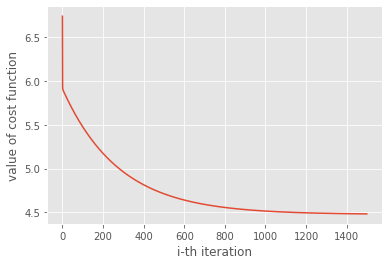

In [9]:
# plotting the learning process
plt.plot([x for x in range(iterations)], np.squeeze(cost_value_history))
plt.xlabel('i-th iteration')
plt.ylabel('value of cost function')
plt.show()

Text(0.5, 0, 'profit')

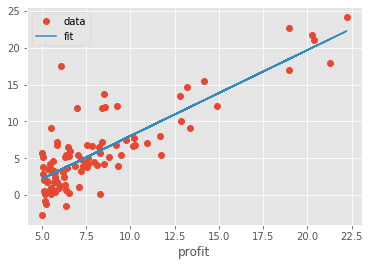

In [10]:
# plot the linear regression 1D hyperplane (line)
plt.plot(X[:,1], y, label='data', marker='o', linestyle='None')
plt.plot(X[:,1], X@theta, label='fit')
plt.legend()
plt.xlabel('population')
plt.xlabel('profit')

In [11]:
# predict values for populations sizes of 35k and 70k
predict = np.array(([1, 3.5],[1, 7.0]))
print(f'For population of 35,000 and 70,000, predicted profit is \
{np.round(np.squeeze(predict@theta)*10000,2)}')

For population of 35,000 and 70,000, predicted profit is [ 4519.77 45342.45]


### 1.4 Visualizing $J(\theta)$

In [12]:
# visualzing cost vs parameters
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.concatenate((theta0_vals[i].reshape(1,-1), theta1_vals[j].reshape(1,-1)), axis=0)
        J_vals[i,j] = computeCost(X, y, t)

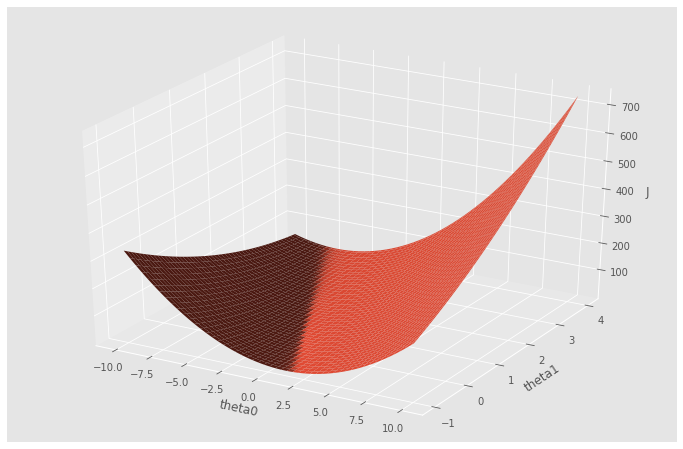

In [13]:
from mpl_toolkits.mplot3d import Axes3D  

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
_theta0_vals, _theta1_vals = np.meshgrid(theta0_vals, theta1_vals)
ax.plot_surface(_theta0_vals, _theta1_vals, J_vals)

ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('J')

ax.view_init(30, -60)
plt.show()

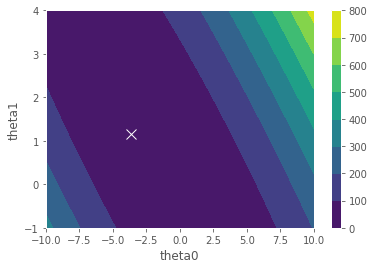

In [14]:
from matplotlib.colors import LogNorm

fig,ax=plt.subplots(1,1)
cp = ax.contourf(_theta0_vals, _theta1_vals, J_vals, linestyles='solid')
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
plt.plot(theta[0], theta[1], marker='x', markersize=10, markeredgecolor='white') 
plt.grid()
plt.show()

## 2 Linear regression with multiple variables

In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

In [15]:
df = pd.read_csv('ex1data2.txt', header=None)
df = df.rename(columns={0: 'size', 
                        1: 'bedrooms',
                        2: 'price'})
df.head()

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [16]:
X = df[['size', 'bedrooms']].values
y = np.array(df.price).reshape(-1,1)

### 2.1 Feature normalization

In [17]:
def featureNormalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return mu, sigma, X_norm

In [18]:
mu, sigma, X = featureNormalize(X)
m = len(y) # size of the input space
X = np.concatenate((np.ones(shape=(m, 1)), X), axis=1) # adding a bias term
X

array([[ 1.00000000e+00,  1.31415422e-01, -2.26093368e-01],
       [ 1.00000000e+00, -5.09640698e-01, -2.26093368e-01],
       [ 1.00000000e+00,  5.07908699e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.43677059e-01, -1.55439190e+00],
       [ 1.00000000e+00,  1.27107075e+00,  1.10220517e+00],
       [ 1.00000000e+00, -1.99450507e-02,  1.10220517e+00],
       [ 1.00000000e+00, -5.93588523e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.29685755e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.89466782e-01, -2.26093368e-01],
       [ 1.00000000e+00, -6.44465993e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.71822042e-02,  1.10220517e+00],
       [ 1.00000000e+00, -8.65999486e-04, -2.26093368e-01],
       [ 1.00000000e+00, -1.40779041e-01, -2.26093368e-01],
       [ 1.00000000e+00,  3.15099326e+00,  2.43050370e+00],
       [ 1.00000000e+00, -9.31923697e-01, -2.26093368e-01],
       [ 1.00000000e+00,  3.80715024e-01,  1.10220517e+00],
       [ 1.00000000e+00, -8.65782986e-01

### 2.2 Gradient descent

In [19]:
alpha = 0.01 # learning rate
num_iters = 400
theta = np.zeros(shape=(3,1))
theta, cost_value_history = gradientDescent(X, y, theta, alpha, num_iters)

Text(0, 0.5, 'cost J')

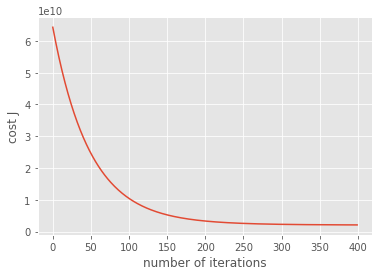

In [20]:
plt.plot(np.squeeze(cost_value_history))
plt.xlabel('number of iterations')
plt.ylabel('cost J')

In [21]:
# predicting some values
my_house = np.array([1650, 3]) # 1650 squaree feet, 3 bedrooms
my_house_norm = (my_house - mu)/sigma
my_house_norm_bias = np.concatenate((np.ones(shape=(1,1)), my_house_norm.reshape(1,2)), axis=1)

price = my_house_norm_bias @ theta

print(f'Predicted price of a 1650 sq-ft, 3 bedroom house \
using gradient descent is {np.squeeze(price)}')

Predicted price of a 1650 sq-ft, 3 bedroom house using gradient descent is 289221.5473712181


### 2.3 Normal equation

Closed form solution to linear regression is:
$$ \theta = (X^T X)^{-1} X^Ty $$
under the condition $ X^T X $ has inverse.

In [22]:
def normalEqn(X, y):
    theta = np.zeros(shape=(X.shape[1], 1))
    theta = np.linalg.pinv(X.T @ X) @ X.T @ y
    return theta

In [23]:
X = df[['size', 'bedrooms']].values
X = np.concatenate((np.ones(shape=(m, 1)), X), axis=1)
y = np.array(df.price).reshape(-1,1)
m = len(y)

In [24]:
# learning theta params through normal eqn
theta = normalEqn(X, y)

In [25]:
# trying out prediction on the same example
my_house_bias = np.array([1, 1650, 3]).reshape(1,3)
price = my_house_bias @ theta

print(f'Predicted price of a 1650 sq-ft, 3 bedroom house \
using normal equation is {np.squeeze(price)}')

Predicted price of a 1650 sq-ft, 3 bedroom house using normal equation is 293081.4643349892
